# COVID - Time series - Total cases prediction

Datasource: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
rawdata=pd.read_csv("..\\COVID_GovernmentData\\covidtesting.csv") 

In [3]:
rawdata.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
processingdata = rawdata[["Reported Date","Total Cases"]]

In [5]:
processingdata = processingdata.dropna(subset=["Reported Date","Total Cases"])

In [6]:
processingdata.head()

,Reported Date,Total Cases
2,2020-01-28,1.0
3,2020-01-30,2.0
4,2020-01-31,2.0
5,2020-02-03,3.0
6,2020-02-04,3.0


In [7]:
processingdata['Reported Date'] = pd.to_datetime(processingdata['Reported Date'],infer_datetime_format=True)
Indexedprocessingdata = processingdata.set_index(['Reported Date'])

In [8]:
from datetime import datetime
Indexedprocessingdata.head(5)

,Total Cases
Reported Date,
2020-01-28,1.0
2020-01-30,2.0
2020-01-31,2.0
2020-02-03,3.0
2020-02-04,3.0


C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


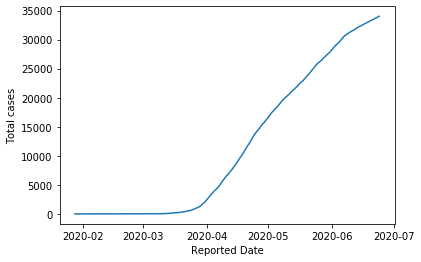

In [9]:
#ploting graph
plt.xlabel("Reported Date")
plt.ylabel("Total cases")
plt.plot(Indexedprocessingdata)


In [10]:
#determining rolling statistics
rolmean = Indexedprocessingdata.rolling(window=12).mean()

rolstd = Indexedprocessingdata.rolling(window=12).std()
print(rolmean,rolstd)

                Total Cases
Reported Date              
2020-01-28              NaN
2020-01-30              NaN
2020-01-31              NaN
2020-02-03              NaN
2020-02-04              NaN
...                     ...
2020-06-20     32238.583333
2020-06-21     32437.416667
2020-06-22     32628.750000
2020-06-23     32821.166667
2020-06-24     33012.000000

[138 rows x 1 columns]                Total Cases
Reported Date             
2020-01-28             NaN
2020-01-30             NaN
2020-01-31             NaN
2020-02-03             NaN
2020-02-04             NaN
...                    ...
2020-06-20      715.286396
2020-06-21      698.408640
2020-06-22      685.107175
2020-06-23      676.952104
2020-06-24      662.785719

[138 rows x 1 columns]


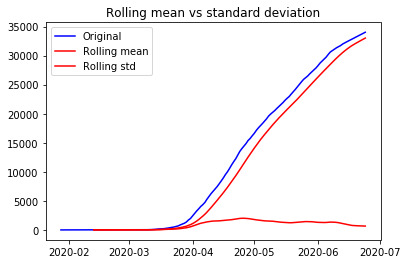

In [11]:
orig = plt.plot(Indexedprocessingdata, color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling mean')
std = plt.plot(rolstd, color='red',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean vs standard deviation')
plt.show(block=False)

In [12]:
#perform Dickey-fuller test

from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-fuller test')
dftest = adfuller(Indexedprocessingdata['Total Cases'])#, autolog='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'p-value', '#Lags used', 'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key]= value
    
print(dfoutput)

Results of Dickey-fuller test
Test Statstic                   -1.945401
p-value                          0.311013
#Lags used                       4.000000
Number of Observations used    133.000000
Critical value (1%)             -3.480500
Critical value (5%)             -2.883528
Critical value (10%)            -2.578496
dtype: float64


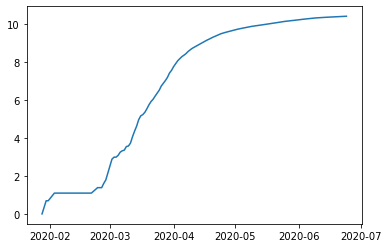

In [13]:
#estimate trend
Indexedprocessingdata_logscale = np.log(Indexedprocessingdata)
plt.plot(Indexedprocessingdata_logscale)

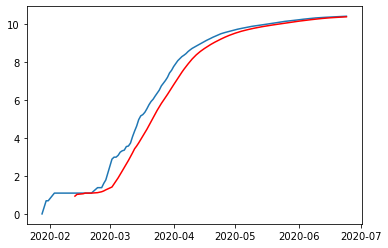

In [14]:
movingAverage = Indexedprocessingdata_logscale.rolling(window=12).mean()
movingStd = Indexedprocessingdata_logscale.rolling(window=12).std()
plt.plot(Indexedprocessingdata_logscale)
plt.plot(movingAverage, color='red')

In [15]:
datasetLogScaleMinusMovingAverage = Indexedprocessingdata_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)



,Total Cases
Reported Date,
2020-01-28,NaN
2020-01-30,NaN
2020-01-31,NaN
2020-02-03,NaN
2020-02-04,NaN
2020-02-05,NaN
2020-02-06,NaN
2020-02-08,NaN
2020-02-10,NaN


In [16]:
#Remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Total Cases
Reported Date,
2020-02-13,1.591285e-01
2020-02-14,6.757752e-02
2020-02-17,3.378876e-02
2020-02-18,2.220446e-16
2020-02-19,2.220446e-16
2020-02-20,2.220446e-16
2020-02-21,2.220446e-16
2020-02-24,2.637086e-01
2020-02-25,2.397351e-01


In [17]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingStd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-fuller test
    print ('Results of Dickey-fuller test')
    dftest = adfuller(timeseries['Total Cases'])#, autolog='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'p-value', '#Lags used', 'Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key]= value

    print(dfoutput)

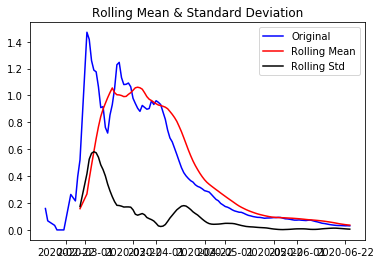

Results of Dickey-fuller test
Test Statstic                   -2.624930
p-value                          0.087953
#Lags used                      13.000000
Number of Observations used    113.000000
Critical value (1%)             -3.489590
Critical value (5%)             -2.887477
Critical value (10%)            -2.580604
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

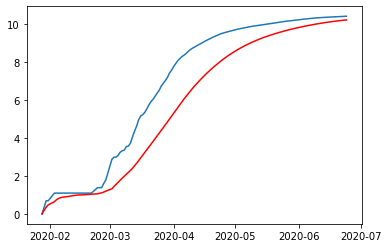

In [19]:
exponentialDecayWeightedAverage = Indexedprocessingdata_logscale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(Indexedprocessingdata_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

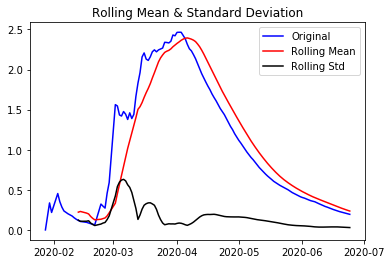

Results of Dickey-fuller test
Test Statstic                   -0.725928
p-value                          0.839919
#Lags used                       1.000000
Number of Observations used    136.000000
Critical value (1%)             -3.479372
Critical value (5%)             -2.883037
Critical value (10%)            -2.578234
dtype: float64


In [20]:
datasetLogScaleMinusMovingExponentialDecayAverage = Indexedprocessingdata_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

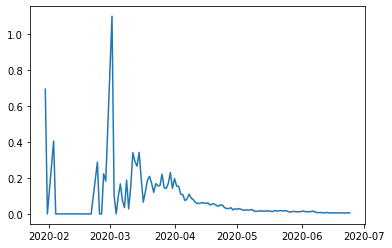

In [21]:
datasetLogDiffShifting = Indexedprocessingdata_logscale - Indexedprocessingdata_logscale.shift()
plt.plot(datasetLogDiffShifting)

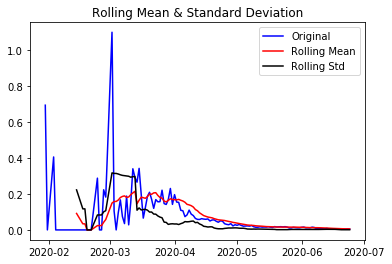

Results of Dickey-fuller test
Test Statstic                   -2.855325
p-value                          0.050795
#Lags used                       4.000000
Number of Observations used    132.000000
Critical value (1%)             -3.480888
Critical value (5%)             -2.883697
Critical value (10%)            -2.578586
dtype: float64


In [22]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose 


In [24]:
decomposition = seasonal_decompose(Indexedprocessingdata_logscale, freq = 12) 
#decomposition = seasonal_decompose(Indexedprocessingdata_logscale)

In [25]:

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

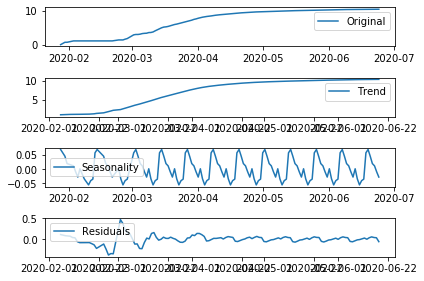

In [26]:



plt.subplot(411) 
plt.plot(Indexedprocessingdata_logscale, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
#plt.show()



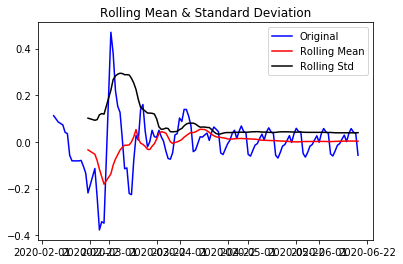

Results of Dickey-fuller test
Test Statstic                 -5.864830e+00
p-value                        3.344469e-07
#Lags used                     5.000000e+00
Number of Observations used    1.200000e+02
Critical value (1%)           -3.486056e+00
Critical value (5%)           -2.885943e+00
Critical value (10%)          -2.579785e+00
dtype: float64


In [27]:
decomposedLodData = residual
decomposedLodData.dropna(inplace=True)
test_stationarity(decomposedLodData)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


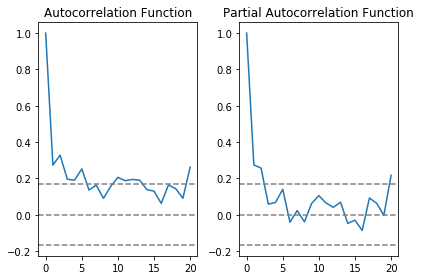

In [28]:
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(datasetLogDiffShifting, nlags=20) 
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.tight_layout()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Ploting AR model


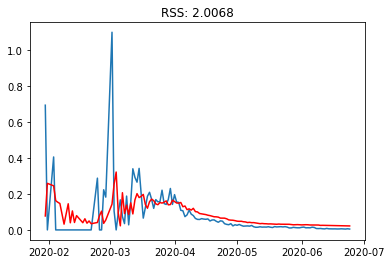

In [29]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(Indexedprocessingdata_logscale, order=(5,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_AR.fittedvalues -datasetLogDiffShifting['Total Cases'])**2))
print('Ploting AR model')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Ploting MA model


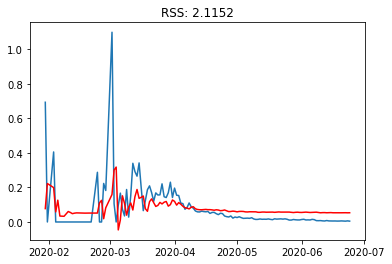

In [30]:
#MA Model

model = ARIMA(Indexedprocessingdata_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_MA.fittedvalues -datasetLogDiffShifting['Total Cases'])**2))
print('Ploting MA model')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 2.0068')

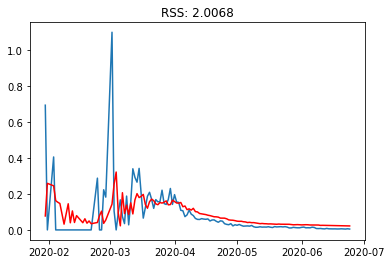

In [31]:
model = ARIMA(Indexedprocessingdata_logscale, order=(5,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' %sum((results_ARIMA.fittedvalues -datasetLogDiffShifting['Total Cases'])**2))


In [32]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(prediction_ARIMA_diff.head())

Reported Date
2020-01-30    0.077556
2020-01-31    0.258852
2020-02-03    0.245103
2020-02-04    0.162423
2020-02-05    0.153756
dtype: float64


In [33]:
#convert to cumulative sum
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Reported Date
2020-01-30    0.077556
2020-01-31    0.336408
2020-02-03    0.581511
2020-02-04    0.743934
2020-02-05    0.897690
dtype: float64


In [34]:
prediction_ARIMA_log = pd.Series(Indexedprocessingdata_logscale['Total Cases'].ix[0], index=Indexedprocessingdata_logscale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Reported Date
2020-01-28    0.000000
2020-01-30    0.077556
2020-01-31    0.336408
2020-02-03    0.581511
2020-02-04    0.743934
dtype: float64

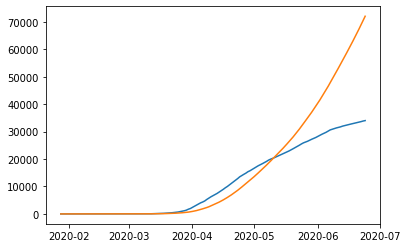

In [35]:
prediction_ARIMA =np.exp(prediction_ARIMA_log)
plt.plot(Indexedprocessingdata)
plt.plot(prediction_ARIMA)

In [36]:
Indexedprocessingdata_logscale

,Total Cases
Reported Date,
2020-01-28,0.000000
2020-01-30,0.693147
2020-01-31,0.693147
2020-02-03,1.098612
2020-02-04,1.098612
...,...
2020-06-20,10.413343
2020-06-21,10.418584
2020-06-22,10.423382


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


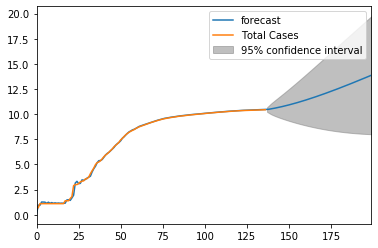

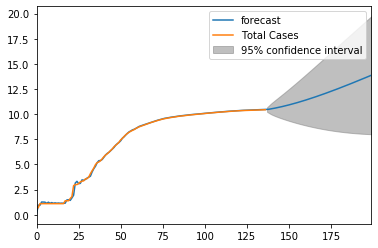

In [37]:
results_ARIMA.plot_predict(1,200)

In [38]:
results_ARIMA.forecast(steps=150)

(array([10.45678469, 10.48139892, 10.51036362, 10.54122456, 10.5724187 ,
        10.60615067, 10.63998861, 10.67614661, 10.71287149, 10.75133489,
        10.79075838, 10.83147391, 10.8733286 , 10.9162455 , 10.9603094 ,
        11.00534335, 11.05144952, 11.09848744, 11.14650522, 11.19542344,
        11.24524031, 11.29591801, 11.34742929, 11.39975426, 11.45285952,
        11.50672878, 11.56133159, 11.61665013, 11.67265885, 11.72933816,
        11.7866664 , 11.84462351, 11.90319021, 11.96234709, 12.02207628,
        12.08235958, 12.14318007, 12.20452082, 12.2663658 , 12.32869927,
        12.39150604, 12.45477142, 12.51848112, 12.58262135, 12.6471787 ,
        12.71214023, 12.77749335, 12.84322589, 12.90932605, 12.9757824 ,
        13.04258388, 13.10971974, 13.17717959, 13.24495335, 13.31303127,
        13.38140389, 13.45006204, 13.51899685, 13.58819971, 13.65766229,
        13.72737652, 13.79733456, 13.86752885, 13.93795203, 14.00859698,
        14.07945682, 14.15052485, 14.22179461, 14.2